In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-wide-unicorn-startups/World_Wide_Unicorn_Startups.csv


# Reading Dataset 

In [2]:
data=pd.read_csv('/kaggle/input/world-wide-unicorn-startups/World_Wide_Unicorn_Startups.csv')

In [3]:
data.shape

(936, 10)

In [4]:
data.head(5)


,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1


In [5]:
data.columns

Index(['Company', 'Valuation', 'Date', 'Country', 'City', 'Industry',
       'Investors', 'year', 'month', 'day'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    936 non-null    object 
 1   Valuation  936 non-null    float64
 2   Date       936 non-null    object 
 3   Country    936 non-null    object 
 4   City       921 non-null    object 
 5   Industry   936 non-null    object 
 6   Investors  936 non-null    object 
 7   year       936 non-null    int64  
 8   month      936 non-null    int64  
 9   day        936 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 73.2+ KB


# Data Inspecting and Cleaning 

In [7]:
data.isnull().sum()

Company       0
Valuation     0
Date          0
Country       0
City         15
Industry      0
Investors     0
year          0
month         0
day           0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.dropna(inplace=True)
data.isnull().sum()

Company      0
Valuation    0
Date         0
Country      0
City         0
Industry     0
Investors    0
year         0
month        0
day          0
dtype: int64

In [10]:
data.shape

(921, 10)

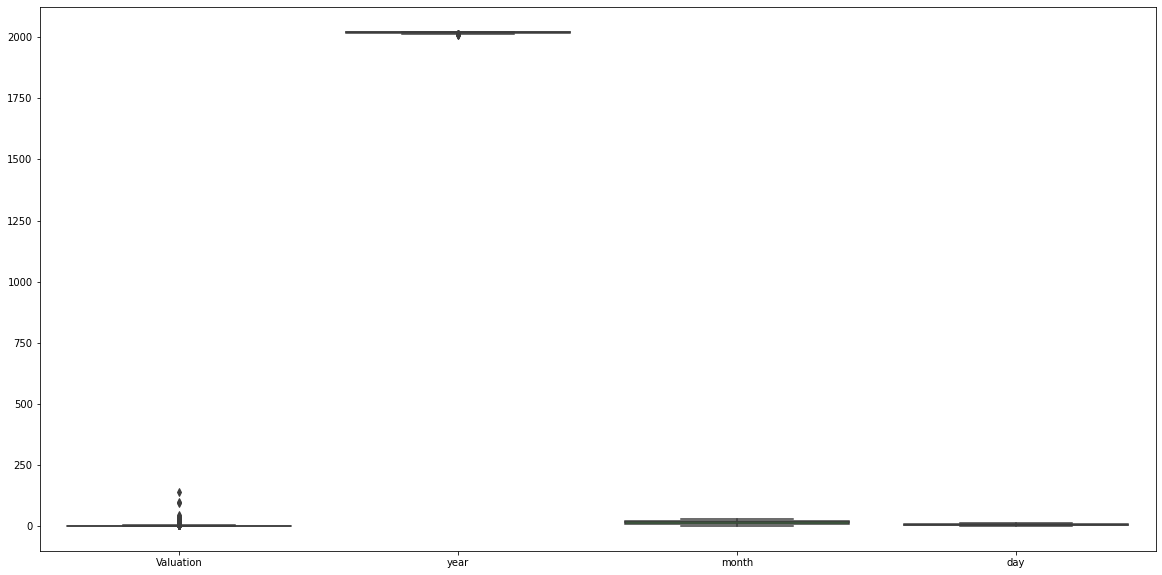

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

no outlier is present

# Exploratory Data Analysis

In [12]:
data.describe()

,Valuation,year,month,day
count,921.000000,921.000000,921.000000,921.000000
mean,3.287904,2019.527687,15.704669,6.735071
std,7.495255,2.027942,8.646290,3.264659
min,1.000000,2007.000000,1.000000,1.000000
25%,1.080000,2018.000000,8.000000,4.000000
50%,1.600000,2021.000000,16.000000,7.000000
75%,3.000000,2021.000000,23.000000,10.000000
max,140.000000,2021.000000,31.000000,12.000000


In [13]:
data.Industry.unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [14]:
data["Industry"]=data["Industry"].apply(lambda x: "Fintech" if x=="Finttech" else x)
data["Industry"]=data["Industry"].apply(lambda x: "Artificial Intelligence" if x=="Artificial intelligence" else x)

Text(0.5, 1.0, 'Industry with their Unicorn Stauts')

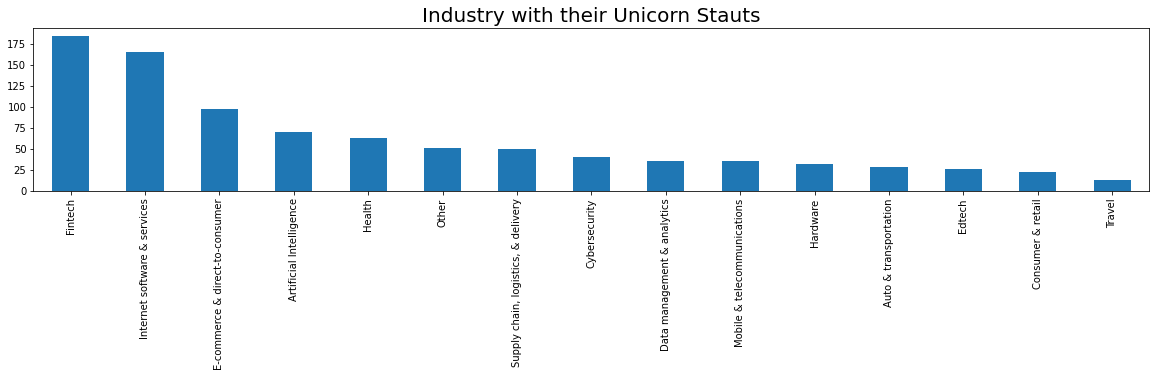

In [15]:
data.Industry.value_counts().plot(kind="bar",figsize=(20,3))
plt.title("Industry with their Unicorn Stauts", fontdict={"fontsize":20})

Text(0.5, 1.0, 'Yearly companies joined unicorn club')

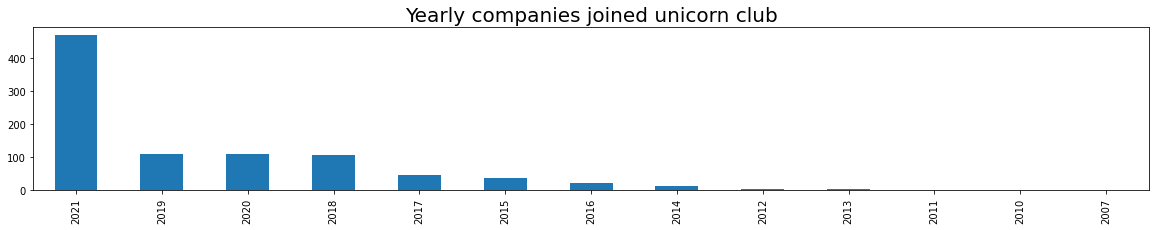

In [16]:
data.year.value_counts().plot(kind="bar",figsize=(20,3))

plt.title("Yearly companies joined unicorn club", fontdict={"fontsize":20})

**Line graph - US Based Companies**

In [17]:
USData = data[data['Country']=="United States"]
USData.head(10)

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,10
10,Chime,25.0,3/5/2019,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,3
15,Fanatics,18.0,6/6/2012,United States,Jacksonville,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",2012,6,6
20,goPuff,15.0,10/8/2020,United States,Philadelphia,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",2020,8,10
21,Plaid Technologies,13.4,12/11/2018,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,11,12
22,Grammarly,13.0,10/10/2019,United States,San Francisco,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2019,10,10


In [18]:
print("Number of US startups count is:")
USData["Company"].count()

Number of US startups count is:


477

<AxesSubplot:>

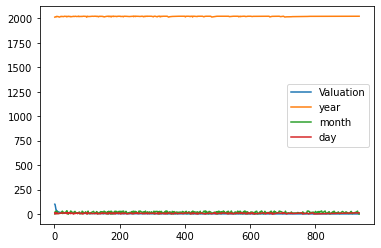

In [19]:

USData.plot(kind="line")


Line takes numeric only only

**How many fintech comapny in ths US**

In [20]:
print("Number of fintech comapny in ths US:",USData["Industry"].value_counts().Fintech)

Number of fintech comapny in ths US: 99


**Most valued unicorn based country**

In [21]:
dfvalued=data.groupby("Country", as_index=False).Valuation.count()
print(" top 10 most valued unicorn based country ")
dfvalued.sort_values(by="Valuation",ascending=False).head(10)

 top 10 most valued unicorn based country 


,Country,Valuation
43,United States,477
8,China,169
18,India,51
42,United Kingdom,37
16,Germany,23
22,Israel,21
15,France,19
5,Brazil,15
6,Canada,15
35,South Korea,11


**Based on valuation which company has most valuation**

In [22]:
dfcom=data.groupby("Company", as_index=False).Valuation.max()
print("Based on valuation which company has most valuation")
dfcom.sort_values(by="Valuation",ascending=False).head(1)

Based on valuation which company has most valuation


,Company,Valuation
113,Bytedance,140.0


**Which city has most valuation startups in world?**

In [23]:
dfcity=data.groupby("City", as_index=False).Valuation.count()
print("Based on valuation Which city has most valuation startups in world")
dfcity.sort_values(by="Valuation",ascending=False).head(1)

Based on valuation Which city has most valuation startups in world


,City,Valuation
183,San Francisco,134


**Total number of valuation startups in all cities**

In [24]:
dfcity=data.groupby("City", as_index=False).Valuation.count()
print("Total number of valuation startups in all cities")
dfcity.sort_values(by="Valuation",ascending=True)

Total number of valuation startups in all cities


,City,Valuation
0,Aarhus,1
131,Maharashtra,1
132,Manila,1
133,Marina del Rey,1
134,McLean,1
...,...,...
121,London,28
198,Shanghai,45
13,Beijing,62
150,New York,81


**Check unicorn startups in San Francisco**

In [25]:
SFData = data[data['City']=="San Francisco"]
SFData.head(10)

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
10,Chime,25.0,3/5/2019,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,3
21,Plaid Technologies,13.4,12/11/2018,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,11,12
22,Grammarly,13.0,10/10/2019,United States,San Francisco,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2019,10,10
24,Faire,12.4,10/30/2019,United States,San Francisco,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2019,30,10
25,Brex,12.3,10/5/2018,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,5,10
27,JUUL Labs,12.0,12/20/2017,United States,San Francisco,Consumer & retail,"0 Sequoia Capital China, SIG Asia Investm...",2017,20,12
36,Ripple,10.0,12/20/2019,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2019,20,12


**Total number of companies in all cities**

In [26]:
print("Total number of companies in all cities")
data.groupby("City", as_index=False).Valuation.count()

Total number of companies in all cities


,City,Valuation
0,Aarhus,1
1,Aberdeen,1
2,Alameda,1
3,Alexandria,1
4,Altrincham,1
...,...,...
234,Wuhan,2
235,Wuxi,1
236,Zephyr Cove,1
237,Zhuhai,1
